<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/MNIST_Digit_Recogniser_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Build Simple CNN**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPool2D

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

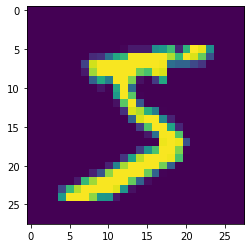

In [25]:
plt.imshow(x_train[0])

In [26]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
x_train.max()

255

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [29]:
x_train.max()

1.0

In [0]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [31]:
x_train[0].shape

(28, 28, 1)

In [0]:
input_shape = x_train[0].shape

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(Conv2D(64, (3,3,), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [37]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 144s 306ms/step - loss: 0.2417 - accuracy: 0.9265 - val_loss: 0.0519 - val_accuracy: 0.9827
Epoch 2/10
469/469 [==============================] - 146s 311ms/step - loss: 0.0843 - accuracy: 0.9745 - val_loss: 0.0407 - val_accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 151s 322ms/step - loss: 0.0648 - accuracy: 0.9804 - val_loss: 0.0328 - val_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 152s 324ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0307 - val_accuracy: 0.9901
Epoch 5/10
469/469 [==============================] - 148s 315ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0299 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 143s 304ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0278 -

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0249 - accuracy: 0.9927


[0.024850446730852127, 0.9926999807357788]

In [40]:
history.history

{'accuracy': [0.9264833331108093,
  0.9745000004768372,
  0.9804333448410034,
  0.9843500256538391,
  0.9861833453178406,
  0.988099992275238,
  0.9896166920661926,
  0.9894499778747559,
  0.9910666942596436,
  0.9912166595458984],
 'loss': [0.2417176514863968,
  0.08426278084516525,
  0.0648188441991806,
  0.05204909294843674,
  0.043926119804382324,
  0.036847714334726334,
  0.03266202285885811,
  0.03281255066394806,
  0.027176575735211372,
  0.02704051323235035],
 'val_accuracy': [0.982699990272522,
  0.9865000247955322,
  0.9887999892234802,
  0.9901000261306763,
  0.9886000156402588,
  0.9897000193595886,
  0.9921000003814697,
  0.9919000267982483,
  0.9922999739646912,
  0.9926999807357788],
 'val_loss': [0.05187051370739937,
  0.04068512097001076,
  0.03282127156853676,
  0.03069113753736019,
  0.034669917076826096,
  0.029917940497398376,
  0.027790604159235954,
  0.02586451731622219,
  0.029905494302511215,
  0.024614637717604637]}

In [0]:

def plot_learningCurve(history, epoch):
  #plot training accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'], loc = 'upper left')
  plt.show()
  #plot taining loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()


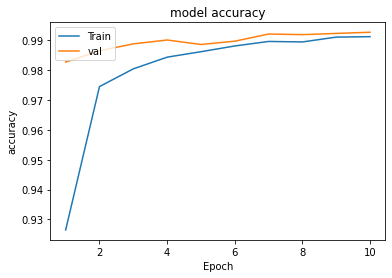

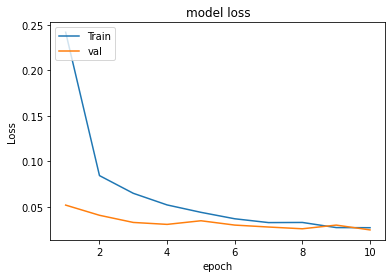

In [45]:
plot_learningCurve(history, 10)